## Demo for learning dual channel PSF from SMLM data

##### Setup environment

In [1]:
import sys
sys.path.append("..")
from psflearning.psflearninglib import psflearninglib
from psflearning import io
from psflearning.makeplots import *
import tensorflow as tf
gpus = tf.config.list_physical_devices('GPU')
tf.config.experimental.set_virtual_device_configuration(gpus[0],[tf.config.experimental.VirtualDeviceConfiguration(memory_limit=6000)])

##### Create psflearning object and load the config file
$\small\color{skyblue}{\mathrm{basefile}}$: config file with all parameters  
$\small\color{skyblue}{\mathrm{sysfile}}$: config file with microscope specific parameters  
For advanced user, pass in base file only as below to interact with all parameters:   
```python
    L.param = io.param.combine('config_base')
```

In [2]:
L = psflearninglib()
L.param = io.param.combine(basefile='config_base',psftype='insitu',channeltype='4pi',sysfile='4pi')

##### Edit user defined parameters

In [3]:
L.param.datapath = r'E:\EMBL files\data for PSF learning\02-18-2022 nup96 mMaple\cell3 mMaple test data/'
L.param.savename = L.param.datapath + 'psfmodel_iter'
L.param.keyword = 'cell3' # keyword of the file name or the full file name without extension
L.param.gain = 0.44
L.param.ccd_offset = 100
L.param.roi.peak_height = 0.4 # relative to maximum bead intensity, bead intensity below which are rejected
L.param.batch_size = 500 # lower this number if out of memory
L.param.option.insitu.stage_pos = 0.6 # micron, stage position relative to infocus at the coverslip
L.param.ref_channel = 1 # choose the brighter channel as the reference channel, 0 or 1
L.param.option.model.const_pupilmag = True 
L.param.option.insitu.var_stage = False

Optional parameters, change cell type to $\small\color{#318CE7}{\mathrm{Python}}$ to activate the cell  
Parameter | Options | Default
--- | --- | ---
$\small\color{skyblue}{\mathrm{PSFtype}}$   | `'insitu_zernike'` | `'insitu_zernike'`
$\small\color{skyblue}{\mathrm{const\_pupilmag}}$ | `True`, `False` | `False`


$\small\color{skyblue}{\mathrm{init\_pupil\_file}}$ :  Full path to the .h5 file from bead PSF learning, Make sure the bead PSF varies in the correct axial direction, this usually requires setting the parameter $\small\color{skyblue}{\mathrm{stage\_mov\_dir}}$ to `'reverse'` during bead PSF learning

##### Start learning

In [4]:
images = L.load_data()
L.getpsfclass()
dataobj = L.prep_data(images)
resfile = L.iterlearn_psf(dataobj,time=0)

E:\EMBL files\data for PSF learning\02-18-2022 nup96 mMaple\cell3 mMaple test data\cell3_nup96_mMaple__560_00043_00000.mat
E:\EMBL files\data for PSF learning\02-18-2022 nup96 mMaple\cell3 mMaple test data\cell3_nup96_mMaple__560_00067_00000.mat
(4, 4000, 200, 200)
rois shape channel 0: (13112, 21, 21)
rois shape channel 1: (13645, 21, 21)
rois shape channel 2: (13112, 21, 21)
rois shape channel 3: (13645, 21, 21)
rois shape channel 0: (10635, 21, 21)
rois shape channel 1: (10635, 21, 21)
rois shape channel 2: (10635, 21, 21)
rois shape channel 3: (10635, 21, 21)


4/6: calculating spline coefficients: 4/4 [00:10s]  2.62s/it total time: 10.50s
5/6: localization: 4/4 [01:09s] 17.34s/it total time: 79.87s
c:\Users\Sheng\Documents\git\python\PSFLearning\demo\..\psflearning\learning\psfs\PSFMultiChannel4pi_smlm_file.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  zp = locres[-1]['zast'].flatten()+np.float32(self.sub_psfs[0].Zoffset.flatten())
3/6: learning: 73/100 [01:02s]  1.17it/s, current loss: 0.26887, total time: 62.32s
3/6: learning: 83/100 [01:10s]  1.18it/s, current loss: 0.29248, total time: 132.56s
3/6: learning: 59/100 [00:50s]  1.18it/s, current loss: 0.26109, total time: 182.66s
3/6: learning: 113/? [01:36s]  1.17it/s, current loss: 0.27342, total time: 279.16s  
3/6: learning: 152/250 [05:38s]  2.23s/it, current loss: 1.05655, total time: 617.43s


outlier percentage: 0.24629878869448185
rois shape channel 0: (2240, 21, 21)
rois shape channel 1: (2240, 21, 21)
rois shape channel 2: (2240, 21, 21)
rois shape channel 3: (2240, 21, 21)


3/6: learning: 329/? [10:05s]  1.84s/it, current loss: 1.03772, total time: 1222.64s  
4/6: calculating spline coefficients: 4/4 [00:10s]  2.60s/it total time: 10.38s
5/6: localization: 4/4 [00:11s]  2.88s/it total time: 21.92s
6/6: saving results: [00:11s] total time: 33.26s
4/6: calculating spline coefficients: 4/4 [00:10s]  2.62s/it total time: 10.48s
5/6: localization: 4/4 [01:04s] 16.04s/it total time: 74.64s
3/6: learning: 41/100 [00:39s]  1.04it/s, current loss: 0.66085, total time: 39.57s
3/6: learning: 21/100 [00:19s]  1.05it/s, current loss: 0.61856, total time: 59.51s
3/6: learning: 62/100 [00:59s]  1.04it/s, current loss: 0.57257, total time: 119.39s
3/6: learning: 61/100 [00:58s]  1.04it/s, current loss: 0.59134, total time: 178.25s
3/6: learning: 278/? [13:43s]  2.96s/it, current loss: 2.32503, total time: 1001.43s   


outlier percentage: 0.25
rois shape channel 0: (2649, 21, 21)
rois shape channel 1: (2649, 21, 21)
rois shape channel 2: (2649, 21, 21)
rois shape channel 3: (2649, 21, 21)


3/6: learning: 117/250 [04:20s]  2.22s/it, current loss: 2.28939, total time: 1261.59s
4/6: calculating spline coefficients: 4/4 [00:10s]  2.59s/it total time: 10.37s
5/6: localization: 4/4 [00:08s]  2.22s/it total time: 19.25s
6/6: saving results: [00:11s] total time: 30.73s


##### Show results

In [5]:
f,p = io.h5.load(resfile) # load result file

channel 0


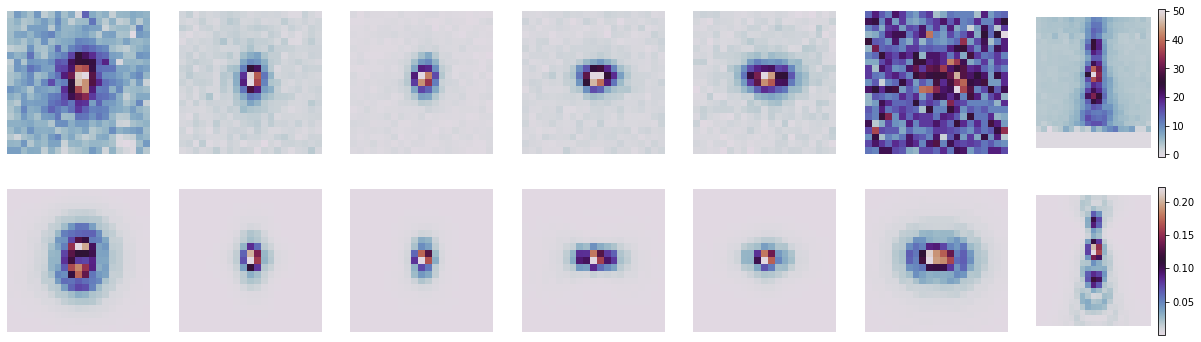

channel 1


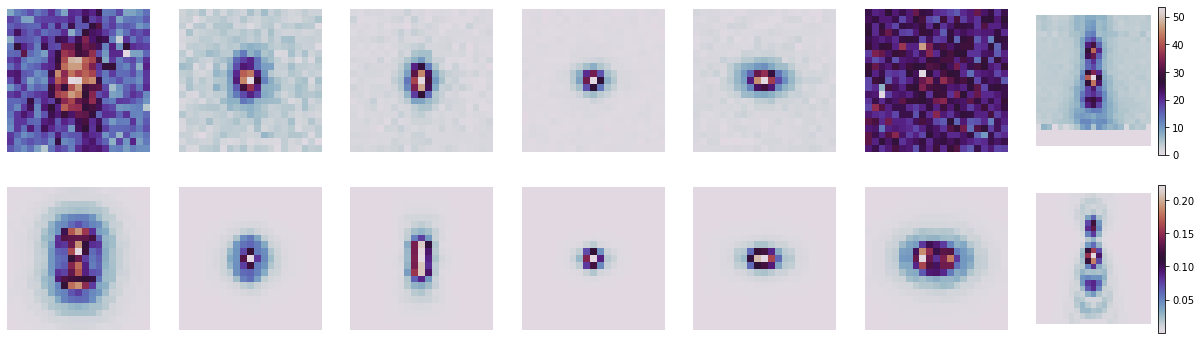

channel 2


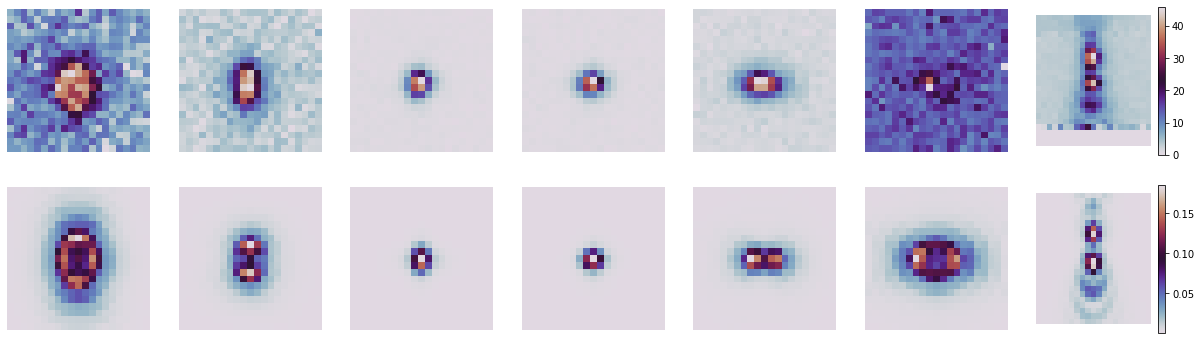

channel 3


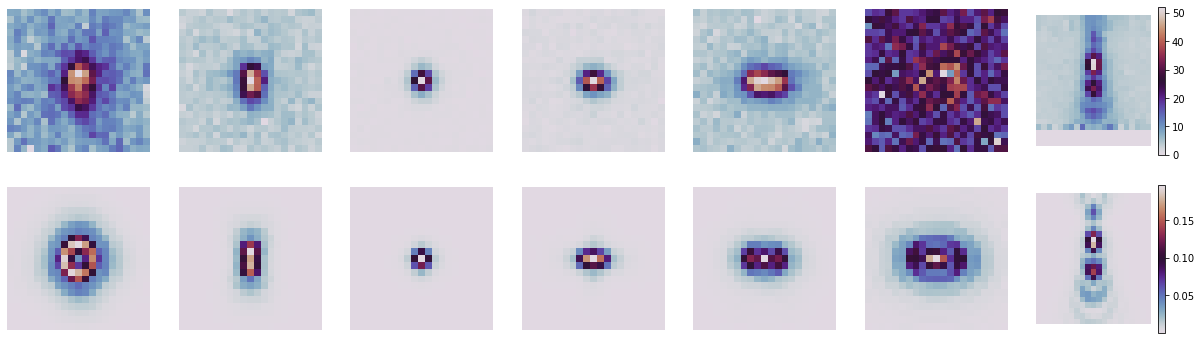

In [6]:
showpsfvsdata_insitu(f,p)

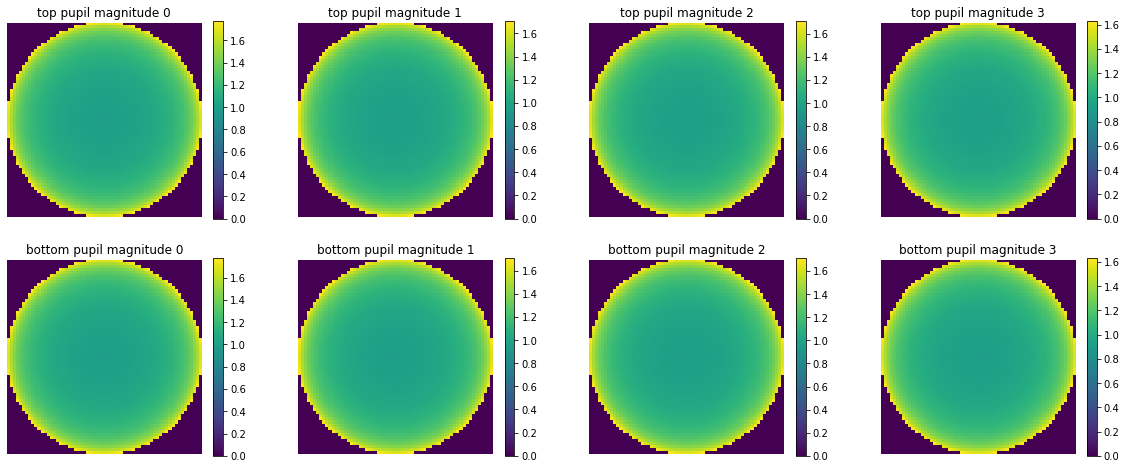

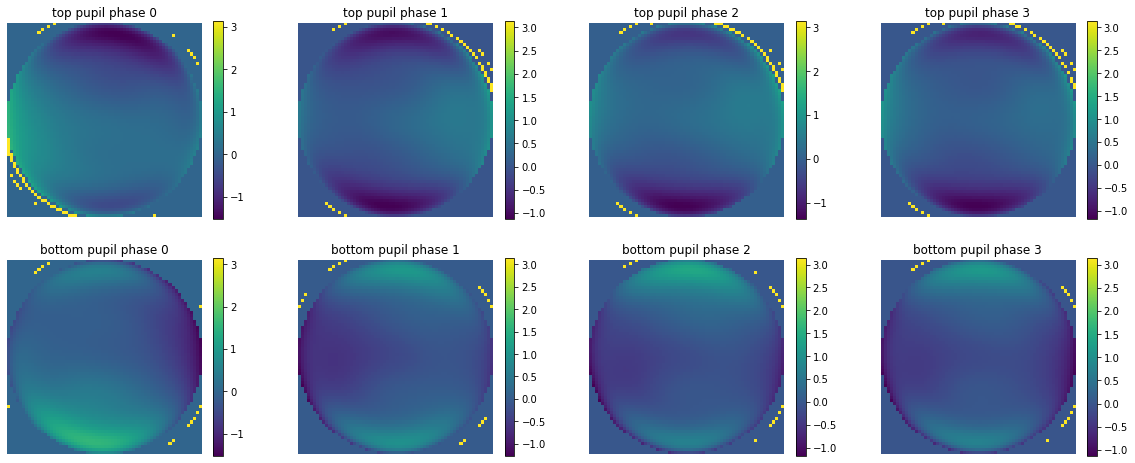

In [7]:
showpupil(f,p)

##### Optional plots

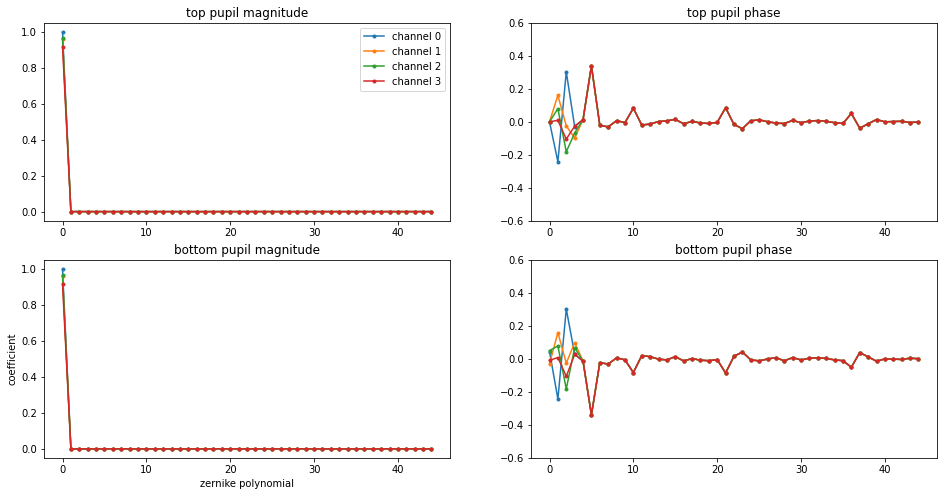

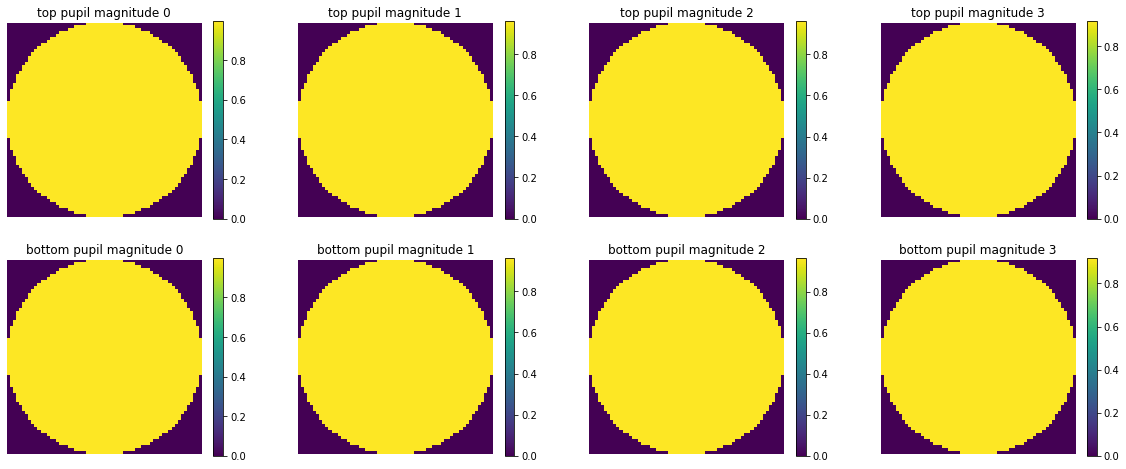

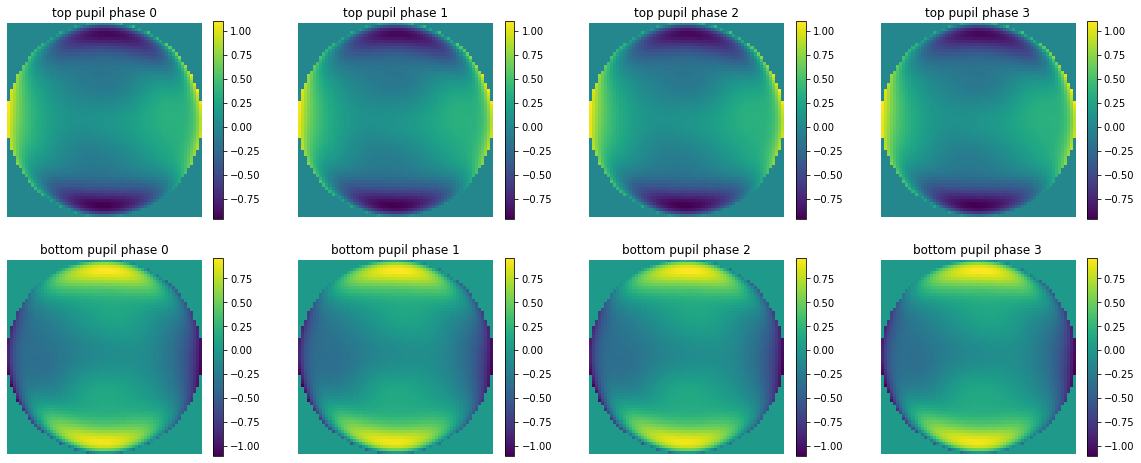

In [8]:
try:
    showzernike(f,p)
except:
    print('no Zernike coefficients')

[[[ 0.9993 -0.0019 -0.    ]
  [ 0.0003  0.9998  0.    ]
  [ 0.0447 -0.5037  1.    ]]

 [[ 0.9942  0.0014 -0.    ]
  [-0.0022  0.9978  0.    ]
  [ 0.668  -0.5232  1.    ]]

 [[ 0.9987  0.0037 -0.    ]
  [-0.0074  0.9963  0.    ]
  [ 0.1948 -0.2842  1.    ]]]


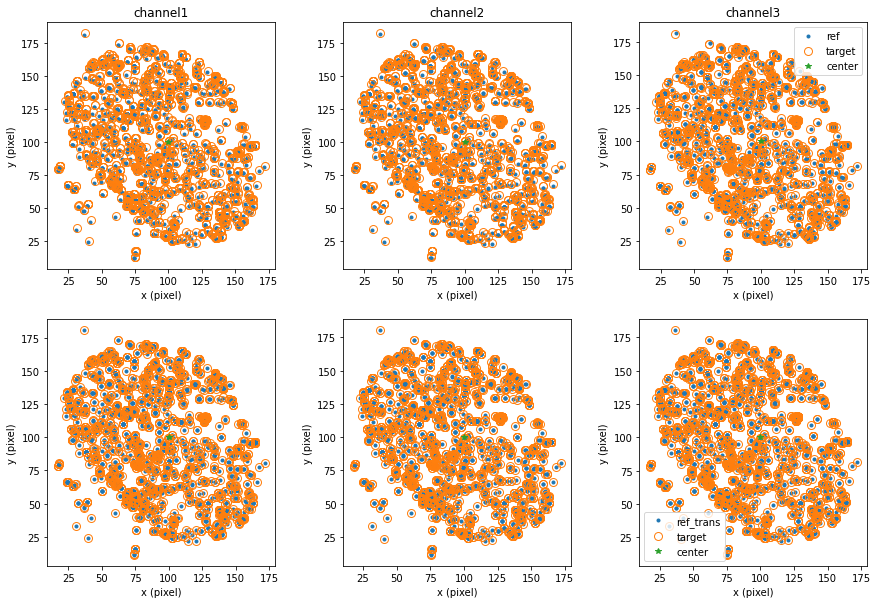

In [9]:
showtransform(f)
np.set_printoptions(precision=4,suppress=True)
print(f.res.T)

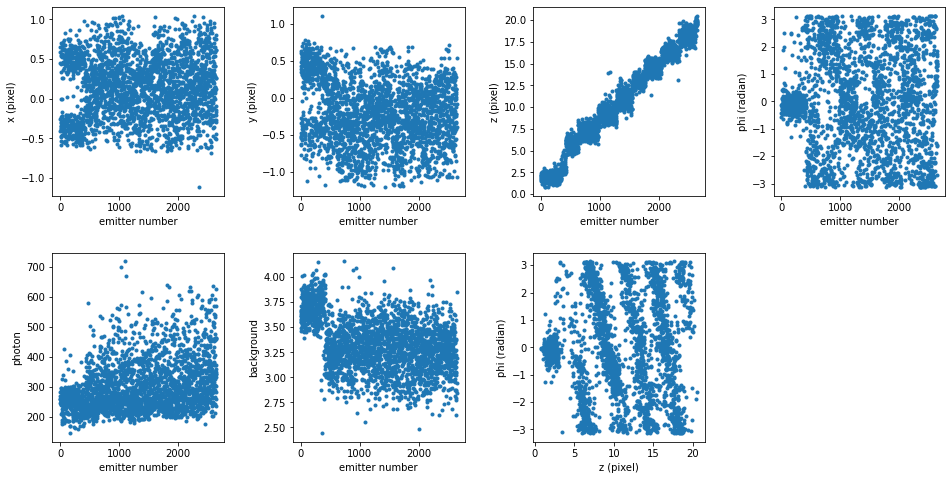

In [10]:
showlearnedparam_insitu(f,p)

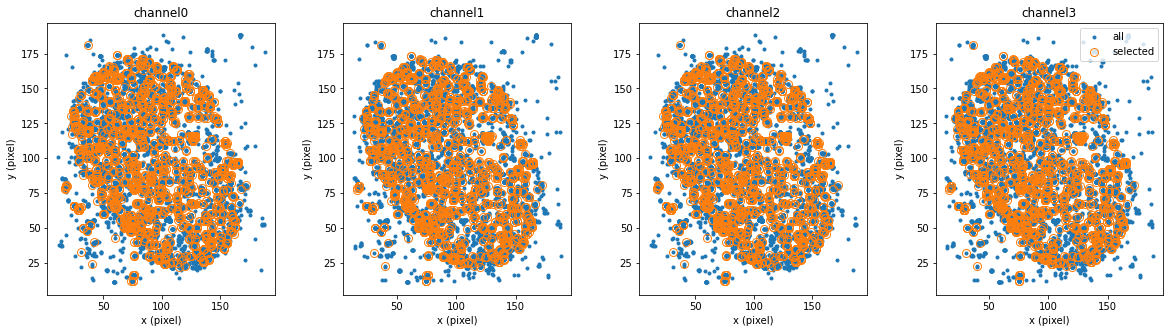

In [11]:
showcoord(f,p)